In [104]:
#to add package, go to REPL
#using Pkg
#Pkg.add("Package Name")
using DataFrames
using RDatasets
using Statistics
using StatsPlots
using CSV
using StatsBase
using NamedArrays
using PrettyTables

using LIBSVM
using Printf
# using SVR
using MLJ
using Mads
using Metrics
using ScikitLearn.GridSearch: GridSearchCV

using PyCall

In [107]:
skSVR = pyimport("sklearn.svm")

PyObject <module 'sklearn.svm' from 'C:\\Users\\ASUS\\.julia\\conda\\3\\lib\\site-packages\\sklearn\\svm\\__init__.py'>

In [3]:
df = CSV.read(joinpath(dirname(pwd()), "Concrete_Data.csv"), DataFrame)

,Cement (kg/m3),Blast Furnace Slag (kg/m3),Fly Ash (kg/m3),Water (kg/m3),Superplasticizer (kg/m3)
,Float64,Float64,Float64,Float64,Float64
1,540.0,0.0,0.0,162.0,2.5
2,540.0,0.0,0.0,162.0,2.5
3,332.5,142.5,0.0,228.0,0.0
4,332.5,142.5,0.0,228.0,0.0
5,198.6,132.4,0.0,192.0,0.0
6,266.0,114.0,0.0,228.0,0.0
7,380.0,95.0,0.0,228.0,0.0
8,380.0,95.0,0.0,228.0,0.0
9,266.0,114.0,0.0,228.0,0.0


In [4]:
#splitting into 70% training, 15% test, 15% validation

dfm = Matrix(df)
# dfms = dfm[shuffle(1:end), :]
dfms = dfm

x = dfms[:, 1:8]
y = dfms[:, 9]

data_split = [0.7, 0.15, 0.15]
split_cs2 = Int.(round.(cumsum(data_split)*length(y)))
split_cs1 = vcat(1, split_cs2[1:(end-1)].+1)

xtrain = x[split_cs1[1]:split_cs2[1], :]
ytrain = y[split_cs1[1]:split_cs2[1]]

xtest = x[split_cs1[2]:split_cs2[2], :]
ytest = y[split_cs1[2]:split_cs2[2]]

xval = x[split_cs1[3]:split_cs2[3], :]
yval = y[split_cs1[3]:split_cs2[3]];

In [114]:
#training the model, setting the hypermeters C, degree, gamma. Want to use gridsearch to optimise hyperparameters. Not sure what SVR.train does #how to do gradient descent for hyperparameters

# pmodel = SVR.train(ytrain, permutedims(xtrain),; kernel_type=SVR.RBF, C= 10.0, degree = 1 , gamma = 0.00003)

# y_pr = SVR.predict(pmodel, permutedims(xtest))
# mse_SVR = mse(y_pr, ytest)

In [153]:
param_grid = Dict(:C => 100:100:1000,
                :gamma => :0.0000001:0000001:0.000001,
                :degree => 0.1:0.1:1)

grid = GridSearchCV(skSVR.SVR(), param_grid, refit = true, verbose = 3)
ScikitLearn.fit!(grid ,xtrain, ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] gamma=1.0e-7, degree=0.1, C=100


[CV] gamma=1.0e-7, degree=0.1, C=100, score=0.05291  -  0.0s
[CV] gamma=1.0e-7, degree=0.1, C=100
[CV] gamma=1.0e-7, degree=0.1, C=100, score=-0.01284  -  0.0s
[CV] gamma=1.0e-7, degree=0.1, C=100
[CV] gamma=1.0e-7, degree=0.1, C=100, score=-0.21247  -  0.0s
[CV] gamma=1.0e-7, degree=0.2, C=100


[CV] gamma=1.0e-7, degree=0.2, C=100, score=0.05291  -  0.0s
[CV] gamma=1.0e-7, degree=0.2, C=100
[CV] gamma=1.0e-7, degree=0.2, C=100, score=-0.01284  -  0.0s
[CV] gamma=1.0e-7, degree=0.2, C=100
[CV] gamma=1.0e-7, degree=0.2, C=100, score=-0.21247  -  0.0s
[CV] gamma=1.0e-7, degree=0.3, C=100
[CV] gamma=1.0e-7, degree=0.3, C=100, score=0.05291  -  0.0s
[CV] gamma=1.0e-7, degree=0.3, C=100


[CV] gamma=1.0e-7, degree=0.3, C=100, score=-0.01284  -  0.0s
[CV] gamma=1.0e-7, degree=0.3, C=100
[CV] gamma=1.0e-7, degree=0.3, C=100, score=-0.21247  -  0.0s
[CV] gamma=1.0e-7, degree=0.4, C=100
[CV] gamma=1.0e-7, degree=0.4, C=100, score=0.05291  -  0.0s
[CV] gamma=1.0e-7, degree=0.4, C=100
[CV] gamma=1.0e-7, degree=0.4, C=100, score=-0.01284  -  0.0s
[CV] gamma=1.0e-7, degree=0.4, C=100


[CV] gamma=1.0e-7, degree=0.4, C=100, score=-0.21247  -  0.0s
[CV] gamma=1.0e-7, degree=0.5, C=100
[CV] gamma=1.0e-7, degree=0.5, C=100, score=0.05291  -  0.0s
[CV] gamma=1.0e-7, degree=0.5, C=100
[CV] gamma=1.0e-7, degree=0.5, C=100, score=-0.01284  -  0.0s
[CV] gamma=1.0e-7, degree=0.5, C=100
[CV] gamma=1.0e-7, degree=0.5, C=100, score=-0.21247  -  0.0s
[CV] gamma=1.0e-7, degree=0.6, C=100


[CV] gamma=1.0e-7, degree=0.6, C=100, score=0.05291  -  0.0s
[CV] gamma=1.0e-7, degree=0.6, C=100
[CV] gamma=1.0e-7, degree=0.6, C=100, score=-0.01284  -  0.0s
[CV] gamma=1.0e-7, degree=0.6, C=100
[CV] gamma=1.0e-7, degree=0.6, C=100, score=-0.21247  -  0.0s
[CV] gamma=1.0e-7, degree=0.7, C=100
[CV] gamma=1.0e-7, degree=0.7, C=100, score=0.05291  -  0.0s
[CV] gamma=1.0e-7, degree=0.7, C=100


[CV] gamma=1.0e-7, degree=0.7, C=100, score=-0.01284  -  0.0s
[CV] gamma=1.0e-7, degree=0.7, C=100
[CV] gamma=1.0e-7, degree=0.7, C=100, score=-0.21247  -  0.0s
[CV] gamma=1.0e-7, degree=0.8, C=100
[CV] gamma=1.0e-7, degree=0.8, C=100, score=0.05291  -  0.0s
[CV] gamma=1.0e-7, degree=0.8, C=100
[CV] gamma=1.0e-7, degree=0.8, C=100, score=-0.01284  -  0.0s
[CV] gamma=1.0e-7, degree=0.8, C=100
[CV] gamma=1.0e-7, degree=0.8, C=100, score=-0.21247  -  0.0s
[CV] gamma=1.0e-7, degree=0.9, C=100


[CV] gamma=1.0e-7, degree=0.9, C=100, score=0.05291  -  0.0s
[CV] gamma=1.0e-7, degree=0.9, C=100
[CV] gamma=1.0e-7, degree=0.9, C=100, score=-0.01284  -  0.0s
[CV] gamma=1.0e-7, degree=0.9, C=100
[CV] gamma=1.0e-7, degree=0.9, C=100, score=-0.21247  -  0.0s
[CV] gamma=1.0e-7, degree=1.0, C=100
[CV] gamma=1.0e-7, degree=1.0, C=100, score=0.05291  -  0.0s
[CV] gamma=1.0e-7, degree=1.0, C=100
[CV] gamma=1.0e-7, degree=1.0, C=100, score=-0.01284  -  0.0s
[CV] gamma=1.0e-7, degree=1.0, C=100


[CV] gamma=1.0e-7, degree=1.0, C=100, score=-0.21247  -  0.0s
[CV] gamma=1.0e-7, degree=0.1, C=200
[CV] gamma=1.0e-7, degree=0.1, C=200, score=0.06718  -  0.0s
[CV] gamma=1.0e-7, degree=0.1, C=200
[CV] gamma=1.0e-7, degree=0.1, C=200, score=0.17489  -  0.0s
[CV] gamma=1.0e-7, degree=0.1, C=200
[CV] gamma=1.0e-7, degree=0.1, C=200, score=0.11101  -  0.0s
[CV] gamma=1.0e-7, degree=0.2, C=200
[CV] gamma=1.0e-7, degree=0.2, C=200, score=0.06718  -  0.0s
[CV] gamma=1.0e-7, degree=0.2, C=200


[CV] gamma=1.0e-7, degree=0.2, C=200, score=0.17489  -  0.0s
[CV] gamma=1.0e-7, degree=0.2, C=200
[CV] gamma=1.0e-7, degree=0.2, C=200, score=0.11101  -  0.0s
[CV] gamma=1.0e-7, degree=0.3, C=200
[CV] gamma=1.0e-7, degree=0.3, C=200, score=0.06718  -  0.0s
[CV] gamma=1.0e-7, degree=0.3, C=200
[CV] gamma=1.0e-7, degree=0.3, C=200, score=0.17489  -  0.0s
[CV] gamma=1.0e-7, degree=0.3, C=200
[CV] gamma=1.0e-7, degree=0.3, C=200, score=0.11101  -  0.0s
[CV] gamma=1.0e-7, degree=0.4, C=200


[CV] gamma=1.0e-7, degree=0.4, C=200, score=0.06718  -  0.0s
[CV] gamma=1.0e-7, degree=0.4, C=200
[CV] gamma=1.0e-7, degree=0.4, C=200, score=0.17489  -  0.0s
[CV] gamma=1.0e-7, degree=0.4, C=200
[CV] gamma=1.0e-7, degree=0.4, C=200, score=0.11101  -  0.0s
[CV] gamma=1.0e-7, degree=0.5, C=200
[CV] gamma=1.0e-7, degree=0.5, C=200, score=0.06718  -  0.0s
[CV] gamma=1.0e-7, degree=0.5, C=200
[CV] gamma=1.0e-7, degree=0.5, C=200, score=0.17489  -  0.0s


[CV] gamma=1.0e-7, degree=0.5, C=200
[CV] gamma=1.0e-7, degree=0.5, C=200, score=0.11101  -  0.0s
[CV] gamma=1.0e-7, degree=0.6, C=200
[CV] gamma=1.0e-7, degree=0.6, C=200, score=0.06718  -  0.0s
[CV] gamma=1.0e-7, degree=0.6, C=200
[CV] gamma=1.0e-7, degree=0.6, C=200, score=0.17489  -  0.0s
[CV] gamma=1.0e-7, degree=0.6, C=200
[CV] gamma=1.0e-7, degree=0.6, C=200, score=0.11101  -  0.0s
[CV] gamma=1.0e-7, degree=0.7, C=200


[CV] gamma=1.0e-7, degree=0.7, C=200, score=0.06718  -  0.0s
[CV] gamma=1.0e-7, degree=0.7, C=200
[CV] gamma=1.0e-7, degree=0.7, C=200, score=0.17489  -  0.0s
[CV] gamma=1.0e-7, degree=0.7, C=200
[CV] gamma=1.0e-7, degree=0.7, C=200, score=0.11101  -  0.0s
[CV] gamma=1.0e-7, degree=0.8, C=200
[CV] gamma=1.0e-7, degree=0.8, C=200, score=0.06718  -  0.0s
[CV] gamma=1.0e-7, degree=0.8, C=200
[CV] gamma=1.0e-7, degree=0.8, C=200, score=0.17489  -  0.0s
[CV] gamma=1.0e-7, degree=0.8, C=200


[CV] gamma=1.0e-7, degree=0.8, C=200, score=0.11101  -  0.0s
[CV] gamma=1.0e-7, degree=0.9, C=200
[CV] gamma=1.0e-7, degree=0.9, C=200, score=0.06718  -  0.0s
[CV] gamma=1.0e-7, degree=0.9, C=200
[CV] gamma=1.0e-7, degree=0.9, C=200, score=0.17489  -  0.0s
[CV] gamma=1.0e-7, degree=0.9, C=200
[CV] gamma=1.0e-7, degree=0.9, C=200, score=0.11101  -  0.0s
[CV] gamma=1.0e-7, degree=1.0, C=200
[CV] gamma=1.0e-7, degree=1.0, C=200, score=0.06718  -  0.0s
[CV] gamma=1.0e-7, degree=1.0, C=200


[CV] gamma=1.0e-7, degree=1.0, C=200, score=0.17489  -  0.0s
[CV] gamma=1.0e-7, degree=1.0, C=200
[CV] gamma=1.0e-7, degree=1.0, C=200, score=0.11101  -  0.0s
[CV] gamma=1.0e-7, degree=0.1, C=300
[CV] gamma=1.0e-7, degree=0.1, C=300, score=0.02419  -  0.0s
[CV] gamma=1.0e-7, degree=0.1, C=300
[CV] gamma=1.0e-7, degree=0.1, C=300, score=0.23646  -  0.0s
[CV] gamma=1.0e-7, degree=0.1, C=300
[CV] gamma=1.0e-7, degree=0.1, C=300, score=0.24445  -  0.0s
[CV] gamma=1.0e-7, degree=0.2, C=300


[CV] gamma=1.0e-7, degree=0.2, C=300, score=0.02419  -  0.0s
[CV] gamma=1.0e-7, degree=0.2, C=300
[CV] gamma=1.0e-7, degree=0.2, C=300, score=0.23646  -  0.0s
[CV] gamma=1.0e-7, degree=0.2, C=300
[CV] gamma=1.0e-7, degree=0.2, C=300, score=0.24445  -  0.0s
[CV] gamma=1.0e-7, degree=0.3, C=300
[CV] gamma=1.0e-7, degree=0.3, C=300, score=0.02419  -  0.0s
[CV] gamma=1.0e-7, degree=0.3, C=300
[CV] gamma=1.0e-7, degree=0.3, C=300, score=0.23646  -  0.0s
[CV] gamma=1.0e-7, degree=0.3, C=300


[CV] gamma=1.0e-7, degree=0.3, C=300, score=0.24445  -  0.0s
[CV] gamma=1.0e-7, degree=0.4, C=300
[CV] gamma=1.0e-7, degree=0.4, C=300, score=0.02419  -  0.0s
[CV] gamma=1.0e-7, degree=0.4, C=300
[CV] gamma=1.0e-7, degree=0.4, C=300, score=0.23646  -  0.0s
[CV] gamma=1.0e-7, degree=0.4, C=300
[CV] gamma=1.0e-7, degree=0.4, C=300, score=0.24445  -  0.0s
[CV] gamma=1.0e-7, degree=0.5, C=300


[CV] gamma=1.0e-7, degree=0.5, C=300, score=0.02419  -  0.0s
[CV] gamma=1.0e-7, degree=0.5, C=300
[CV] gamma=1.0e-7, degree=0.5, C=300, score=0.23646  -  0.0s
[CV] gamma=1.0e-7, degree=0.5, C=300
[CV] gamma=1.0e-7, degree=0.5, C=300, score=0.24445  -  0.0s
[CV] gamma=1.0e-7, degree=0.6, C=300
[CV] gamma=1.0e-7, degree=0.6, C=300, score=0.02419  -  0.0s
[CV] gamma=1.0e-7, degree=0.6, C=300
[CV] gamma=1.0e-7, degree=0.6, C=300, score=0.23646  -  0.0s


[CV] gamma=1.0e-7, degree=0.6, C=300
[CV] gamma=1.0e-7, degree=0.6, C=300, score=0.24445  -  0.0s
[CV] gamma=1.0e-7, degree=0.7, C=300
[CV] gamma=1.0e-7, degree=0.7, C=300, score=0.02419  -  0.0s
[CV] gamma=1.0e-7, degree=0.7, C=300
[CV] gamma=1.0e-7, degree=0.7, C=300, score=0.23646  -  0.0s
[CV] gamma=1.0e-7, degree=0.7, C=300


[CV] gamma=1.0e-7, degree=0.7, C=300, score=0.24445  -  0.0s
[CV] gamma=1.0e-7, degree=0.8, C=300
[CV] gamma=1.0e-7, degree=0.8, C=300, score=0.02419  -  0.0s
[CV] gamma=1.0e-7, degree=0.8, C=300
[CV] gamma=1.0e-7, degree=0.8, C=300, score=0.23646  -  0.0s
[CV] gamma=1.0e-7, degree=0.8, C=300


[CV] gamma=1.0e-7, degree=0.8, C=300, score=0.24445  -  0.1s
[CV] gamma=1.0e-7, degree=0.9, C=300
[CV] gamma=1.0e-7, degree=0.9, C=300, score=0.02419  -  0.0s
[CV] gamma=1.0e-7, degree=0.9, C=300
[CV] gamma=1.0e-7, degree=0.9, C=300, score=0.23646  -  0.0s
[CV] gamma=1.0e-7, degree=0.9, C=300


[CV] gamma=1.0e-7, degree=0.9, C=300, score=0.24445  -  0.0s
[CV] gamma=1.0e-7, degree=1.0, C=300
[CV] gamma=1.0e-7, degree=1.0, C=300, score=0.02419  -  0.0s
[CV] gamma=1.0e-7, degree=1.0, C=300
[CV] gamma=1.0e-7, degree=1.0, C=300, score=0.23646  -  0.0s
[CV] gamma=1.0e-7, degree=1.0, C=300
[CV] gamma=1.0e-7, degree=1.0, C=300, score=0.24445  -  0.0s


[CV] gamma=1.0e-7, degree=0.1, C=400
[CV] gamma=1.0e-7, degree=0.1, C=400, score=-0.00390  -  0.0s
[CV] gamma=1.0e-7, degree=0.1, C=400
[CV] gamma=1.0e-7, degree=0.1, C=400, score=0.29307  -  0.0s
[CV] gamma=1.0e-7, degree=0.1, C=400
[CV] gamma=1.0e-7, degree=0.1, C=400, score=0.30767  -  0.0s
[CV] gamma=1.0e-7, degree=0.2, C=400
[CV] gamma=1.0e-7, degree=0.2, C=400, score=-0.00390  -  0.0s
[CV] gamma=1.0e-7, degree=0.2, C=400


[CV] gamma=1.0e-7, degree=0.2, C=400, score=0.29307  -  0.0s
[CV] gamma=1.0e-7, degree=0.2, C=400
[CV] gamma=1.0e-7, degree=0.2, C=400, score=0.30767  -  0.0s
[CV] gamma=1.0e-7, degree=0.3, C=400
[CV] gamma=1.0e-7, degree=0.3, C=400, score=-0.00390  -  0.0s
[CV] gamma=1.0e-7, degree=0.3, C=400
[CV] gamma=1.0e-7, degree=0.3, C=400, score=0.29307  -  0.0s
[CV] gamma=1.0e-7, degree=0.3, C=400


[CV] gamma=1.0e-7, degree=0.3, C=400, score=0.30767  -  0.0s
[CV] gamma=1.0e-7, degree=0.4, C=400
[CV] gamma=1.0e-7, degree=0.4, C=400, score=-0.00390  -  0.0s
[CV] gamma=1.0e-7, degree=0.4, C=400
[CV] gamma=1.0e-7, degree=0.4, C=400, score=0.29307  -  0.0s
[CV] gamma=1.0e-7, degree=0.4, C=400
[CV] gamma=1.0e-7, degree=0.4, C=400, score=0.30767  -  0.0s
[CV] gamma=1.0e-7, degree=0.5, C=400


[CV] gamma=1.0e-7, degree=0.5, C=400, score=-0.00390  -  0.0s
[CV] gamma=1.0e-7, degree=0.5, C=400
[CV] gamma=1.0e-7, degree=0.5, C=400, score=0.29307  -  0.0s
[CV] gamma=1.0e-7, degree=0.5, C=400
[CV] gamma=1.0e-7, degree=0.5, C=400, score=0.30767  -  0.0s
[CV] gamma=1.0e-7, degree=0.6, C=400
[CV] gamma=1.0e-7, degree=0.6, C=400, score=-0.00390  -  0.0s
[CV] gamma=1.0e-7, degree=0.6, C=400


[CV] gamma=1.0e-7, degree=0.6, C=400, score=0.29307  -  0.0s
[CV] gamma=1.0e-7, degree=0.6, C=400
[CV] gamma=1.0e-7, degree=0.6, C=400, score=0.30767  -  0.0s
[CV] gamma=1.0e-7, degree=0.7, C=400
[CV] gamma=1.0e-7, degree=0.7, C=400, score=-0.00390  -  0.0s
[CV] gamma=1.0e-7, degree=0.7, C=400
[CV] gamma=1.0e-7, degree=0.7, C=400, score=0.29307  -  0.0s
[CV] gamma=1.0e-7, degree=0.7, C=400


[CV] gamma=1.0e-7, degree=0.7, C=400, score=0.30767  -  0.0s
[CV] gamma=1.0e-7, degree=0.8, C=400
[CV] gamma=1.0e-7, degree=0.8, C=400, score=-0.00390  -  0.0s
[CV] gamma=1.0e-7, degree=0.8, C=400
[CV] gamma=1.0e-7, degree=0.8, C=400, score=0.29307  -  0.0s
[CV] gamma=1.0e-7, degree=0.8, C=400
[CV] gamma=1.0e-7, degree=0.8, C=400, score=0.30767  -  0.0s
[CV] gamma=1.0e-7, degree=0.9, C=400


[CV] gamma=1.0e-7, degree=0.9, C=400, score=-0.00390  -  0.0s
[CV] gamma=1.0e-7, degree=0.9, C=400
[CV] gamma=1.0e-7, degree=0.9, C=400, score=0.29307  -  0.0s
[CV] gamma=1.0e-7, degree=0.9, C=400
[CV] gamma=1.0e-7, degree=0.9, C=400, score=0.30767  -  0.0s
[CV] gamma=1.0e-7, degree=1.0, C=400
[CV] gamma=1.0e-7, degree=1.0, C=400, score=-0.00390  -  0.0s
[CV] gamma=1.0e-7, degree=1.0, C=400


[CV] gamma=1.0e-7, degree=1.0, C=400, score=0.29307  -  0.0s
[CV] gamma=1.0e-7, degree=1.0, C=400
[CV] gamma=1.0e-7, degree=1.0, C=400, score=0.30767  -  0.0s
[CV] gamma=1.0e-7, degree=0.1, C=500
[CV] gamma=1.0e-7, degree=0.1, C=500, score=-0.05715  -  0.0s
[CV] gamma=1.0e-7, degree=0.1, C=500
[CV] gamma=1.0e-7, degree=0.1, C=500, score=0.31352  -  0.0s
[CV] gamma=1.0e-7, degree=0.1, C=500


[CV] gamma=1.0e-7, degree=0.1, C=500, score=0.33980  -  0.0s
[CV] gamma=1.0e-7, degree=0.2, C=500
[CV] gamma=1.0e-7, degree=0.2, C=500, score=-0.05715  -  0.0s
[CV] gamma=1.0e-7, degree=0.2, C=500
[CV] gamma=1.0e-7, degree=0.2, C=500, score=0.31352  -  0.0s
[CV] gamma=1.0e-7, degree=0.2, C=500
[CV] gamma=1.0e-7, degree=0.2, C=500, score=0.33980  -  0.0s
[CV] gamma=1.0e-7, degree=0.3, C=500


[CV] gamma=1.0e-7, degree=0.3, C=500, score=-0.05715  -  0.0s
[CV] gamma=1.0e-7, degree=0.3, C=500
[CV] gamma=1.0e-7, degree=0.3, C=500, score=0.31352  -  0.0s
[CV] gamma=1.0e-7, degree=0.3, C=500
[CV] gamma=1.0e-7, degree=0.3, C=500, score=0.33980  -  0.0s
[CV] gamma=1.0e-7, degree=0.4, C=500
[CV] gamma=1.0e-7, degree=0.4, C=500, score=-0.05715  -  0.0s
[CV] gamma=1.0e-7, degree=0.4, C=500


[CV] gamma=1.0e-7, degree=0.4, C=500, score=0.31352  -  0.0s
[CV] gamma=1.0e-7, degree=0.4, C=500
[CV] gamma=1.0e-7, degree=0.4, C=500, score=0.33980  -  0.0s
[CV] gamma=1.0e-7, degree=0.5, C=500
[CV] gamma=1.0e-7, degree=0.5, C=500, score=-0.05715  -  0.0s
[CV] gamma=1.0e-7, degree=0.5, C=500
[CV] gamma=1.0e-7, degree=0.5, C=500, score=0.31352  -  0.0s
[CV] gamma=1.0e-7, degree=0.5, C=500


[CV] gamma=1.0e-7, degree=0.5, C=500, score=0.33980  -  0.0s
[CV] gamma=1.0e-7, degree=0.6, C=500
[CV] gamma=1.0e-7, degree=0.6, C=500, score=-0.05715  -  0.0s
[CV] gamma=1.0e-7, degree=0.6, C=500
[CV] gamma=1.0e-7, degree=0.6, C=500, score=0.31352  -  0.0s
[CV] gamma=1.0e-7, degree=0.6, C=500
[CV] gamma=1.0e-7, degree=0.6, C=500, score=0.33980  -  0.0s
[CV] gamma=1.0e-7, degree=0.7, C=500


[CV] gamma=1.0e-7, degree=0.7, C=500, score=-0.05715  -  0.0s
[CV] gamma=1.0e-7, degree=0.7, C=500
[CV] gamma=1.0e-7, degree=0.7, C=500, score=0.31352  -  0.0s
[CV] gamma=1.0e-7, degree=0.7, C=500
[CV] gamma=1.0e-7, degree=0.7, C=500, score=0.33980  -  0.0s
[CV] gamma=1.0e-7, degree=0.8, C=500
[CV] gamma=1.0e-7, degree=0.8, C=500, score=-0.05715  -  0.0s
[CV] gamma=1.0e-7, degree=0.8, C=500
[CV] gamma=1.0e-7, degree=0.8, C=500, score=0.31352  -  0.0s
[CV] gamma=1.0e-7, degree=0.8, C=500


[CV] gamma=1.0e-7, degree=0.8, C=500, score=0.33980  -  0.0s
[CV] gamma=1.0e-7, degree=0.9, C=500
[CV] gamma=1.0e-7, degree=0.9, C=500, score=-0.05715  -  0.0s
[CV] gamma=1.0e-7, degree=0.9, C=500
[CV] gamma=1.0e-7, degree=0.9, C=500, score=0.31352  -  0.0s
[CV] gamma=1.0e-7, degree=0.9, C=500
[CV] gamma=1.0e-7, degree=0.9, C=500, score=0.33980  -  0.0s
[CV] gamma=1.0e-7, degree=1.0, C=500
[CV] gamma=1.0e-7, degree=1.0, C=500, score=-0.05715  -  0.0s
[CV] gamma=1.0e-7, degree=1.0, C=500


[CV] gamma=1.0e-7, degree=1.0, C=500, score=0.31352  -  0.0s
[CV] gamma=1.0e-7, degree=1.0, C=500
[CV] gamma=1.0e-7, degree=1.0, C=500, score=0.33980  -  0.0s
[CV] gamma=1.0e-7, degree=0.1, C=600
[CV] gamma=1.0e-7, degree=0.1, C=600, score=-0.06949  -  0.0s
[CV] gamma=1.0e-7, degree=0.1, C=600
[CV] gamma=1.0e-7, degree=0.1, C=600, score=0.33003  -  0.0s
[CV] gamma=1.0e-7, degree=0.1, C=600


[CV] gamma=1.0e-7, degree=0.1, C=600, score=0.35499  -  0.0s
[CV] gamma=1.0e-7, degree=0.2, C=600
[CV] gamma=1.0e-7, degree=0.2, C=600, score=-0.06949  -  0.0s
[CV] gamma=1.0e-7, degree=0.2, C=600
[CV] gamma=1.0e-7, degree=0.2, C=600, score=0.33003  -  0.0s
[CV] gamma=1.0e-7, degree=0.2, C=600
[CV] gamma=1.0e-7, degree=0.2, C=600, score=0.35499  -  0.0s
[CV] gamma=1.0e-7, degree=0.3, C=600


[CV] gamma=1.0e-7, degree=0.3, C=600, score=-0.06949  -  0.0s
[CV] gamma=1.0e-7, degree=0.3, C=600
[CV] gamma=1.0e-7, degree=0.3, C=600, score=0.33003  -  0.0s
[CV] gamma=1.0e-7, degree=0.3, C=600
[CV] gamma=1.0e-7, degree=0.3, C=600, score=0.35499  -  0.0s
[CV] gamma=1.0e-7, degree=0.4, C=600
[CV] gamma=1.0e-7, degree=0.4, C=600, score=-0.06949  -  0.0s
[CV] gamma=1.0e-7, degree=0.4, C=600


[CV] gamma=1.0e-7, degree=0.4, C=600, score=0.33003  -  0.0s
[CV] gamma=1.0e-7, degree=0.4, C=600
[CV] gamma=1.0e-7, degree=0.4, C=600, score=0.35499  -  0.0s
[CV] gamma=1.0e-7, degree=0.5, C=600
[CV] gamma=1.0e-7, degree=0.5, C=600, score=-0.06949  -  0.0s
[CV] gamma=1.0e-7, degree=0.5, C=600
[CV] gamma=1.0e-7, degree=0.5, C=600, score=0.33003  -  0.0s
[CV] gamma=1.0e-7, degree=0.5, C=600


[CV] gamma=1.0e-7, degree=0.5, C=600, score=0.35499  -  0.0s
[CV] gamma=1.0e-7, degree=0.6, C=600
[CV] gamma=1.0e-7, degree=0.6, C=600, score=-0.06949  -  0.0s
[CV] gamma=1.0e-7, degree=0.6, C=600
[CV] gamma=1.0e-7, degree=0.6, C=600, score=0.33003  -  0.0s
[CV] gamma=1.0e-7, degree=0.6, C=600
[CV] gamma=1.0e-7, degree=0.6, C=600, score=0.35499  -  0.0s
[CV] gamma=1.0e-7, degree=0.7, C=600


[CV] gamma=1.0e-7, degree=0.7, C=600, score=-0.06949  -  0.0s
[CV] gamma=1.0e-7, degree=0.7, C=600
[CV] gamma=1.0e-7, degree=0.7, C=600, score=0.33003  -  0.0s
[CV] gamma=1.0e-7, degree=0.7, C=600
[CV] gamma=1.0e-7, degree=0.7, C=600, score=0.35499  -  0.0s
[CV] gamma=1.0e-7, degree=0.8, C=600
[CV] gamma=1.0e-7, degree=0.8, C=600, score=-0.06949  -  0.0s
[CV] gamma=1.0e-7, degree=0.8, C=600


[CV] gamma=1.0e-7, degree=0.8, C=600, score=0.33003  -  0.0s
[CV] gamma=1.0e-7, degree=0.8, C=600
[CV] gamma=1.0e-7, degree=0.8, C=600, score=0.35499  -  0.0s
[CV] gamma=1.0e-7, degree=0.9, C=600
[CV] gamma=1.0e-7, degree=0.9, C=600, score=-0.06949  -  0.0s
[CV] gamma=1.0e-7, degree=0.9, C=600
[CV] gamma=1.0e-7, degree=0.9, C=600, score=0.33003  -  0.0s
[CV] gamma=1.0e-7, degree=0.9, C=600


[CV] gamma=1.0e-7, degree=0.9, C=600, score=0.35499  -  0.0s
[CV] gamma=1.0e-7, degree=1.0, C=600
[CV] gamma=1.0e-7, degree=1.0, C=600, score=-0.06949  -  0.0s
[CV] gamma=1.0e-7, degree=1.0, C=600
[CV] gamma=1.0e-7, degree=1.0, C=600, score=0.33003  -  0.0s
[CV] gamma=1.0e-7, degree=1.0, C=600
[CV] gamma=1.0e-7, degree=1.0, C=600, score=0.35499  -  0.0s
[CV] gamma=1.0e-7, degree=0.1, C=700


[CV] gamma=1.0e-7, degree=0.1, C=700, score=-0.10883  -  0.0s
[CV] gamma=1.0e-7, degree=0.1, C=700
[CV] gamma=1.0e-7, degree=0.1, C=700, score=0.34088  -  0.0s
[CV] gamma=1.0e-7, degree=0.1, C=700
[CV] gamma=1.0e-7, degree=0.1, C=700, score=0.37381  -  0.0s
[CV] gamma=1.0e-7, degree=0.2, C=700
[CV] gamma=1.0e-7, degree=0.2, C=700, score=-0.10883  -  0.0s
[CV] gamma=1.0e-7, degree=0.2, C=700


[CV] gamma=1.0e-7, degree=0.2, C=700, score=0.34088  -  0.0s
[CV] gamma=1.0e-7, degree=0.2, C=700
[CV] gamma=1.0e-7, degree=0.2, C=700, score=0.37381  -  0.0s
[CV] gamma=1.0e-7, degree=0.3, C=700
[CV] gamma=1.0e-7, degree=0.3, C=700, score=-0.10883  -  0.0s
[CV] gamma=1.0e-7, degree=0.3, C=700
[CV] gamma=1.0e-7, degree=0.3, C=700, score=0.34088  -  0.0s
[CV] gamma=1.0e-7, degree=0.3, C=700


[CV] gamma=1.0e-7, degree=0.3, C=700, score=0.37381  -  0.0s
[CV] gamma=1.0e-7, degree=0.4, C=700
[CV] gamma=1.0e-7, degree=0.4, C=700, score=-0.10883  -  0.0s
[CV] gamma=1.0e-7, degree=0.4, C=700
[CV] gamma=1.0e-7, degree=0.4, C=700, score=0.34088  -  0.0s
[CV] gamma=1.0e-7, degree=0.4, C=700
[CV] gamma=1.0e-7, degree=0.4, C=700, score=0.37381  -  0.0s
[CV] gamma=1.0e-7, degree=0.5, C=700


[CV] gamma=1.0e-7, degree=0.5, C=700, score=-0.10883  -  0.0s
[CV] gamma=1.0e-7, degree=0.5, C=700
[CV] gamma=1.0e-7, degree=0.5, C=700, score=0.34088  -  0.0s
[CV] gamma=1.0e-7, degree=0.5, C=700
[CV] gamma=1.0e-7, degree=0.5, C=700, score=0.37381  -  0.0s
[CV] gamma=1.0e-7, degree=0.6, C=700
[CV] gamma=1.0e-7, degree=0.6, C=700, score=-0.10883  -  0.0s
[CV] gamma=1.0e-7, degree=0.6, C=700


[CV] gamma=1.0e-7, degree=0.6, C=700, score=0.34088  -  0.0s
[CV] gamma=1.0e-7, degree=0.6, C=700
[CV] gamma=1.0e-7, degree=0.6, C=700, score=0.37381  -  0.0s
[CV] gamma=1.0e-7, degree=0.7, C=700
[CV] gamma=1.0e-7, degree=0.7, C=700, score=-0.10883  -  0.0s
[CV] gamma=1.0e-7, degree=0.7, C=700
[CV] gamma=1.0e-7, degree=0.7, C=700, score=0.34088  -  0.0s
[CV] gamma=1.0e-7, degree=0.7, C=700


[CV] gamma=1.0e-7, degree=0.7, C=700, score=0.37381  -  0.0s
[CV] gamma=1.0e-7, degree=0.8, C=700
[CV] gamma=1.0e-7, degree=0.8, C=700, score=-0.10883  -  0.0s
[CV] gamma=1.0e-7, degree=0.8, C=700
[CV] gamma=1.0e-7, degree=0.8, C=700, score=0.34088  -  0.0s
[CV] gamma=1.0e-7, degree=0.8, C=700
[CV] gamma=1.0e-7, degree=0.8, C=700, score=0.37381  -  0.0s
[CV] gamma=1.0e-7, degree=0.9, C=700


[CV] gamma=1.0e-7, degree=0.9, C=700, score=-0.10883  -  0.0s
[CV] gamma=1.0e-7, degree=0.9, C=700
[CV] gamma=1.0e-7, degree=0.9, C=700, score=0.34088  -  0.0s
[CV] gamma=1.0e-7, degree=0.9, C=700
[CV] gamma=1.0e-7, degree=0.9, C=700, score=0.37381  -  0.0s
[CV] gamma=1.0e-7, degree=1.0, C=700
[CV] gamma=1.0e-7, degree=1.0, C=700, score=-0.10883  -  0.0s
[CV] gamma=1.0e-7, degree=1.0, C=700


[CV] gamma=1.0e-7, degree=1.0, C=700, score=0.34088  -  0.0s
[CV] gamma=1.0e-7, degree=1.0, C=700
[CV] gamma=1.0e-7, degree=1.0, C=700, score=0.37381  -  0.0s
[CV] gamma=1.0e-7, degree=0.1, C=800
[CV] gamma=1.0e-7, degree=0.1, C=800, score=-0.11542  -  0.0s
[CV] gamma=1.0e-7, degree=0.1, C=800
[CV] gamma=1.0e-7, degree=0.1, C=800, score=0.34661  -  0.0s
[CV] gamma=1.0e-7, degree=0.1, C=800


[CV] gamma=1.0e-7, degree=0.1, C=800, score=0.38032  -  0.0s
[CV] gamma=1.0e-7, degree=0.2, C=800
[CV] gamma=1.0e-7, degree=0.2, C=800, score=-0.11542  -  0.0s
[CV] gamma=1.0e-7, degree=0.2, C=800
[CV] gamma=1.0e-7, degree=0.2, C=800, score=0.34661  -  0.0s
[CV] gamma=1.0e-7, degree=0.2, C=800
[CV] gamma=1.0e-7, degree=0.2, C=800, score=0.38032  -  0.0s
[CV] gamma=1.0e-7, degree=0.3, C=800


[CV] gamma=1.0e-7, degree=0.3, C=800, score=-0.11542  -  0.0s
[CV] gamma=1.0e-7, degree=0.3, C=800
[CV] gamma=1.0e-7, degree=0.3, C=800, score=0.34661  -  0.0s
[CV] gamma=1.0e-7, degree=0.3, C=800
[CV] gamma=1.0e-7, degree=0.3, C=800, score=0.38032  -  0.0s
[CV] gamma=1.0e-7, degree=0.4, C=800
[CV] gamma=1.0e-7, degree=0.4, C=800, score=-0.11542  -  0.0s
[CV] gamma=1.0e-7, degree=0.4, C=800


[CV] gamma=1.0e-7, degree=0.4, C=800, score=0.34661  -  0.0s
[CV] gamma=1.0e-7, degree=0.4, C=800
[CV] gamma=1.0e-7, degree=0.4, C=800, score=0.38032  -  0.0s
[CV] gamma=1.0e-7, degree=0.5, C=800
[CV] gamma=1.0e-7, degree=0.5, C=800, score=-0.11542  -  0.0s
[CV] gamma=1.0e-7, degree=0.5, C=800
[CV] gamma=1.0e-7, degree=0.5, C=800, score=0.34661  -  0.0s
[CV] gamma=1.0e-7, degree=0.5, C=800


[CV] gamma=1.0e-7, degree=0.5, C=800, score=0.38032  -  0.0s
[CV] gamma=1.0e-7, degree=0.6, C=800
[CV] gamma=1.0e-7, degree=0.6, C=800, score=-0.11542  -  0.0s
[CV] gamma=1.0e-7, degree=0.6, C=800
[CV] gamma=1.0e-7, degree=0.6, C=800, score=0.34661  -  0.0s
[CV] gamma=1.0e-7, degree=0.6, C=800
[CV] gamma=1.0e-7, degree=0.6, C=800, score=0.38032  -  0.0s
[CV] gamma=1.0e-7, degree=0.7, C=800


[CV] gamma=1.0e-7, degree=0.7, C=800, score=-0.11542  -  0.0s
[CV] gamma=1.0e-7, degree=0.7, C=800
[CV] gamma=1.0e-7, degree=0.7, C=800, score=0.34661  -  0.0s
[CV] gamma=1.0e-7, degree=0.7, C=800
[CV] gamma=1.0e-7, degree=0.7, C=800, score=0.38032  -  0.0s
[CV] gamma=1.0e-7, degree=0.8, C=800
[CV] gamma=1.0e-7, degree=0.8, C=800, score=-0.11542  -  0.0s
[CV] gamma=1.0e-7, degree=0.8, C=800


[CV] gamma=1.0e-7, degree=0.8, C=800, score=0.34661  -  0.0s
[CV] gamma=1.0e-7, degree=0.8, C=800
[CV] gamma=1.0e-7, degree=0.8, C=800, score=0.38032  -  0.0s
[CV] gamma=1.0e-7, degree=0.9, C=800
[CV] gamma=1.0e-7, degree=0.9, C=800, score=-0.11542  -  0.0s
[CV] gamma=1.0e-7, degree=0.9, C=800
[CV] gamma=1.0e-7, degree=0.9, C=800, score=0.34661  -  0.0s
[CV] gamma=1.0e-7, degree=0.9, C=800


[CV] gamma=1.0e-7, degree=0.9, C=800, score=0.38032  -  0.0s
[CV] gamma=1.0e-7, degree=1.0, C=800
[CV] gamma=1.0e-7, degree=1.0, C=800, score=-0.11542  -  0.0s
[CV] gamma=1.0e-7, degree=1.0, C=800
[CV] gamma=1.0e-7, degree=1.0, C=800, score=0.34661  -  0.0s
[CV] gamma=1.0e-7, degree=1.0, C=800
[CV] gamma=1.0e-7, degree=1.0, C=800, score=0.38032  -  0.0s
[CV] gamma=1.0e-7, degree=0.1, C=900


[CV] gamma=1.0e-7, degree=0.1, C=900, score=-0.12192  -  0.0s
[CV] gamma=1.0e-7, degree=0.1, C=900
[CV] gamma=1.0e-7, degree=0.1, C=900, score=0.36611  -  0.0s
[CV] gamma=1.0e-7, degree=0.1, C=900
[CV] gamma=1.0e-7, degree=0.1, C=900, score=0.38648  -  0.0s
[CV] gamma=1.0e-7, degree=0.2, C=900


[CV] gamma=1.0e-7, degree=0.2, C=900, score=-0.12192  -  0.0s
[CV] gamma=1.0e-7, degree=0.2, C=900
[CV] gamma=1.0e-7, degree=0.2, C=900, score=0.36611  -  0.0s
[CV] gamma=1.0e-7, degree=0.2, C=900
[CV] gamma=1.0e-7, degree=0.2, C=900, score=0.38648  -  0.0s
[CV] gamma=1.0e-7, degree=0.3, C=900


[CV] gamma=1.0e-7, degree=0.3, C=900, score=-0.12192  -  0.0s
[CV] gamma=1.0e-7, degree=0.3, C=900
[CV] gamma=1.0e-7, degree=0.3, C=900, score=0.36611  -  0.0s
[CV] gamma=1.0e-7, degree=0.3, C=900
[CV] gamma=1.0e-7, degree=0.3, C=900, score=0.38648  -  0.0s
[CV] gamma=1.0e-7, degree=0.4, C=900
[CV] gamma=1.0e-7, degree=0.4, C=900, score=-0.12192  -  0.0s
[CV] gamma=1.0e-7, degree=0.4, C=900


[CV] gamma=1.0e-7, degree=0.4, C=900, score=0.36611  -  0.0s
[CV] gamma=1.0e-7, degree=0.4, C=900
[CV] gamma=1.0e-7, degree=0.4, C=900, score=0.38648  -  0.0s
[CV] gamma=1.0e-7, degree=0.5, C=900
[CV] gamma=1.0e-7, degree=0.5, C=900, score=-0.12192  -  0.0s
[CV] gamma=1.0e-7, degree=0.5, C=900
[CV] gamma=1.0e-7, degree=0.5, C=900, score=0.36611  -  0.0s
[CV] gamma=1.0e-7, degree=0.5, C=900


[CV] gamma=1.0e-7, degree=0.5, C=900, score=0.38648  -  0.0s
[CV] gamma=1.0e-7, degree=0.6, C=900
[CV] gamma=1.0e-7, degree=0.6, C=900, score=-0.12192  -  0.0s
[CV] gamma=1.0e-7, degree=0.6, C=900
[CV] gamma=1.0e-7, degree=0.6, C=900, score=0.36611  -  0.0s
[CV] gamma=1.0e-7, degree=0.6, C=900
[CV] gamma=1.0e-7, degree=0.6, C=900, score=0.38648  -  0.0s
[CV] gamma=1.0e-7, degree=0.7, C=900


[CV] gamma=1.0e-7, degree=0.7, C=900, score=-0.12192  -  0.0s
[CV] gamma=1.0e-7, degree=0.7, C=900
[CV] gamma=1.0e-7, degree=0.7, C=900, score=0.36611  -  0.0s
[CV] gamma=1.0e-7, degree=0.7, C=900
[CV] gamma=1.0e-7, degree=0.7, C=900, score=0.38648  -  0.0s
[CV] gamma=1.0e-7, degree=0.8, C=900
[CV] gamma=1.0e-7, degree=0.8, C=900, score=-0.12192  -  0.0s
[CV] gamma=1.0e-7, degree=0.8, C=900


[CV] gamma=1.0e-7, degree=0.8, C=900, score=0.36611  -  0.0s
[CV] gamma=1.0e-7, degree=0.8, C=900
[CV] gamma=1.0e-7, degree=0.8, C=900, score=0.38648  -  0.0s
[CV] gamma=1.0e-7, degree=0.9, C=900
[CV] gamma=1.0e-7, degree=0.9, C=900, score=-0.12192  -  0.0s
[CV] gamma=1.0e-7, degree=0.9, C=900
[CV] gamma=1.0e-7, degree=0.9, C=900, score=0.36611  -  0.0s
[CV] gamma=1.0e-7, degree=0.9, C=900


[CV] gamma=1.0e-7, degree=0.9, C=900, score=0.38648  -  0.0s
[CV] gamma=1.0e-7, degree=1.0, C=900
[CV] gamma=1.0e-7, degree=1.0, C=900, score=-0.12192  -  0.0s
[CV] gamma=1.0e-7, degree=1.0, C=900
[CV] gamma=1.0e-7, degree=1.0, C=900, score=0.36611  -  0.0s
[CV] gamma=1.0e-7, degree=1.0, C=900
[CV] gamma=1.0e-7, degree=1.0, C=900, score=0.38648  -  0.0s
[CV] gamma=1.0e-7, degree=0.1, C=1000


[CV] gamma=1.0e-7, degree=0.1, C=1000, score=-0.11881  -  0.0s
[CV] gamma=1.0e-7, degree=0.1, C=1000
[CV] gamma=1.0e-7, degree=0.1, C=1000, score=0.37989  -  0.0s
[CV] gamma=1.0e-7, degree=0.1, C=1000
[CV] gamma=1.0e-7, degree=0.1, C=1000, score=0.38803  -  0.0s
[CV] gamma=1.0e-7, degree=0.2, C=1000
[CV] gamma=1.0e-7, degree=0.2, C=1000, score=-0.11881  -  0.0s
[CV] gamma=1.0e-7, degree=0.2, C=1000


[CV] gamma=1.0e-7, degree=0.2, C=1000, score=0.37989  -  0.0s
[CV] gamma=1.0e-7, degree=0.2, C=1000
[CV] gamma=1.0e-7, degree=0.2, C=1000, score=0.38803  -  0.0s
[CV] gamma=1.0e-7, degree=0.3, C=1000
[CV] gamma=1.0e-7, degree=0.3, C=1000, score=-0.11881  -  0.0s
[CV] gamma=1.0e-7, degree=0.3, C=1000
[CV] gamma=1.0e-7, degree=0.3, C=1000, score=0.37989  -  0.0s
[CV] gamma=1.0e-7, degree=0.3, C=1000


[CV] gamma=1.0e-7, degree=0.3, C=1000, score=0.38803  -  0.0s
[CV] gamma=1.0e-7, degree=0.4, C=1000
[CV] gamma=1.0e-7, degree=0.4, C=1000, score=-0.11881  -  0.0s
[CV] gamma=1.0e-7, degree=0.4, C=1000
[CV] gamma=1.0e-7, degree=0.4, C=1000, score=0.37989  -  0.0s
[CV] gamma=1.0e-7, degree=0.4, C=1000
[CV] gamma=1.0e-7, degree=0.4, C=1000, score=0.38803  -  0.0s
[CV] gamma=1.0e-7, degree=0.5, C=1000


[CV] gamma=1.0e-7, degree=0.5, C=1000, score=-0.11881  -  0.0s
[CV] gamma=1.0e-7, degree=0.5, C=1000
[CV] gamma=1.0e-7, degree=0.5, C=1000, score=0.37989  -  0.0s
[CV] gamma=1.0e-7, degree=0.5, C=1000
[CV] gamma=1.0e-7, degree=0.5, C=1000, score=0.38803  -  0.0s
[CV] gamma=1.0e-7, degree=0.6, C=1000
[CV] gamma=1.0e-7, degree=0.6, C=1000, score=-0.11881  -  0.0s
[CV] gamma=1.0e-7, degree=0.6, C=1000


[CV] gamma=1.0e-7, degree=0.6, C=1000, score=0.37989  -  0.0s
[CV] gamma=1.0e-7, degree=0.6, C=1000
[CV] gamma=1.0e-7, degree=0.6, C=1000, score=0.38803  -  0.0s
[CV] gamma=1.0e-7, degree=0.7, C=1000
[CV] gamma=1.0e-7, degree=0.7, C=1000, score=-0.11881  -  0.0s
[CV] gamma=1.0e-7, degree=0.7, C=1000


[CV] gamma=1.0e-7, degree=0.7, C=1000, score=0.37989  -  0.0s
[CV] gamma=1.0e-7, degree=0.7, C=1000
[CV] gamma=1.0e-7, degree=0.7, C=1000, score=0.38803  -  0.0s
[CV] gamma=1.0e-7, degree=0.8, C=1000
[CV] gamma=1.0e-7, degree=0.8, C=1000, score=-0.11881  -  0.0s
[CV] gamma=1.0e-7, degree=0.8, C=1000


[CV] gamma=1.0e-7, degree=0.8, C=1000, score=0.37989  -  0.0s
[CV] gamma=1.0e-7, degree=0.8, C=1000
[CV] gamma=1.0e-7, degree=0.8, C=1000, score=0.38803  -  0.0s
[CV] gamma=1.0e-7, degree=0.9, C=1000
[CV] gamma=1.0e-7, degree=0.9, C=1000, score=-0.11881  -  0.0s
[CV] gamma=1.0e-7, degree=0.9, C=1000


[CV] gamma=1.0e-7, degree=0.9, C=1000, score=0.37989  -  0.0s
[CV] gamma=1.0e-7, degree=0.9, C=1000
[CV] gamma=1.0e-7, degree=0.9, C=1000, score=0.38803  -  0.0s
[CV] gamma=1.0e-7, degree=1.0, C=1000
[CV] gamma=1.0e-7, degree=1.0, C=1000, score=-0.11881  -  0.0s
[CV] gamma=1.0e-7, degree=1.0, C=1000


[CV] gamma=1.0e-7, degree=1.0, C=1000, score=0.37989  -  0.0s
[CV] gamma=1.0e-7, degree=1.0, C=1000
[CV] gamma=1.0e-7, degree=1.0, C=1000, score=0.38803  -  0.0s


GridSearchCV
  estimator: PyObject
  param_grid: Dict{Symbol, AbstractRange}
  scoring: Nothing nothing
  loss_func: Nothing nothing
  score_func: Nothing nothing
  fit_params: Dict{Any, Any}
  n_jobs: Int64 1
  iid: Bool true
  refit: Bool true
  cv: Nothing nothing
  verbose: Int64 3
  error_score: String "raise"
  scorer_: score (function of type typeof(ScikitLearnBase.score))
  best_params_: Dict{Symbol, Any}
  best_score_: Float64 0.2159052027050175
  grid_scores_: Array{ScikitLearn.Skcore.CVScoreTuple}((100,))
  best_estimator_: PyObject


In [154]:
println("Best hyper-parameters: $(grid.best_params_)")

Best hyper-parameters: Dict{Symbol, Any}(:gamma => 1.0e-7, :degree => 0.1, :C => 1000)


In [156]:
regressor = ScikitLearn.fit!(skSVR.SVR(C=1000.0, gamma=1.0e-7, degree =0.1),xtrain,ytrain)
y_pr = ScikitLearn.predict(regressor,xtest)
mse_SVR = mse(y_pr, ytest)

# C=50.0, gamma=0.000003, degree =1

97.55619674655925

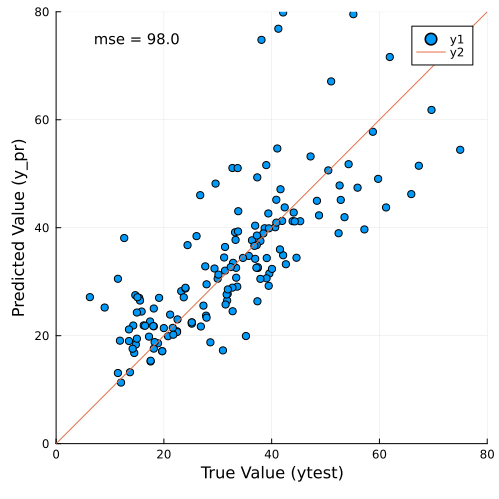

In [157]:
#plotting graph to see predicted vs true
compare_plt = plot(ytest, y_pr, 
st=:scatter,
xlims=(0,80),
ylims=(0,80),
xlab = "True Value (ytest)",
ylab = "Predicted Value (y_pr)",
size = (500,500))

xx = 0:80
yy = 0:80

plot!(compare_plt, xx, yy, st=:line)

mse_SVR = mse(y_pr, ytest)
annotate!(15,75, text("mse = $(round(mse_SVR, sigdigits=2))", 10))

display(compare_plt)